**Υπολογιστική Γεωμετρία** <br>
Ελένη Λιάρου<br>
1115201900100<br>

# Υλοποίηση 1: Κυρτό Περίβλημα σε 2D και 3D<br>






## 1.   Εύρεση κυρτού περιβλήματος στο επίπεδο (2Δ) με τους εξής αλγορίθμους:


  *   Αυξητικό αλγόριθμο
  *   Αλγόριθμο περιτυλίγματος
  *   Αλγόριθμο Διαίρει και Βασίλευε
  *   Αλγόριθμο QuickHull  





In [ ]:
import sys
import time 
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.spatial import ConvexHull, convex_hull_plot_2d#to implement QuickHull
from math import sqrt, pow, atan2, pi, degrees
import random

class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def __str__(self):
        return '(' + str(self.x) + ', ' + str(self.y) + ')'

    def getX(self):
        return self.x

    def getY(self):
        return self.y


In [ ]:
def CCW(p0, p1, p2):
  if (p1[0]-p0[0])*(p2[1]-p0[1]) - (p1[1]-p0[1])*(p2[0]-p0[0])>0:
    return 1
  return -1

def CW(p0, p1, p2):
  if (p1[0]-p0[0])*(p2[1]-p0[1]) - (p1[1]-p0[1])*(p2[0]-p0[0])<0:
    return 1
  return -1

def collinear(p0,p1,p2):
  if (p1[0]-p0[0])*(p2[1]-p0[1]) - (p1[1]-p0[1])*(p2[0]-p0[0])==0:
    return 1
  return -1

def orientation(p0,p1,p2):  # calculates orientation of segment (a,b) based on segment (b,c) where a,b,c are points

    # if orientation > 0, the angle between the segments is 0 < angle < 180
    # if orientation < 0, the angle between the segments is 180 < angle < 360
    # if orientation is 0, the angle between the segments is k*180

    return (p1[1]-p0[1])*(p2[0]-p1[0]) - (p2[1]-p1[1])*(p1[0]-p0[0])


#find point with smallest x and y coordinate from a Set of points, used by giftwrapping algo 
def LeftmostPoint(S):
  index = 0;
  for i in range(1,len(S)):
      if S[i].x < S[index].x:
          index = i
      elif S[i].x == S[index].x:
          if S[i].y < S[index].y:
              index = i
  return index

#find point with smallest x and y coordinate from a Set of points, used by divide n conquer
def LeftmostPointDivide(S):
  index = 0;
  for i in range(1,len(S)):
      if S[i][0] < S[index][0]:
          index = i
      elif S[i][0] == S[index][0]:
          if S[i][1] < S[index][1]:
              index = i
  return index

#find point with biggest x and y coordinate from a Set of points, used by divide n conquer
def RightmostPoint(S):
  index = 0;
  for i in range(1,len(S)):
      if S[i][0] > S[index][0]:
          index = i
      elif S[i][0] == S[index][0]:
          if S[i][1] > S[index][1]:
              index = i
  return index


#incremental using graham scan for 2D
def Incremental(P):
  P.sort()
  Lupper = [P[0], P[1]]
  for i in range(2, len(P)):
    Lupper.append(P[i])
    while(len(Lupper)>2 and CW(Lupper[-1], Lupper[-2], Lupper[-3])==-1):
      del Lupper[-2]
  Llower = [P[-1], P[-2]]
  for i in range(len(P)-3, -1,-1):
    Llower.append(P[i])
    while(len(Llower)>2 and CW(Llower[-1], Llower[-2], Llower[-3])==-1):
      del Llower[-2]

  del Llower[0]
  del Llower[-1]
  Lfinal = Llower+Lupper 

  return np.array(Lfinal)


#gift wrapping for 2D
def GiftWrapping(S):
  n = len(S)
  CH = []
  allPoints = []
  for i in range(len(S)):
    allPoints.append(Point(S[i][0], S[i][1]))
  index_r0 = LeftmostPoint(allPoints)
  r0 = S[index_r0]
  i = 2
  r = r0
  index_u=0
  index_r = index_r0
  CH.append(r)
  totalIter=0

  while(True):
    index_u = (index_u + 1) % n
    u = S[0]
    for j in range(n):
      if j == index_r0:
        continue
      t = S[j]
      if ((collinear(r,u,t)==1 and  (math.dist(r, t) > math.dist(r, u))) or CW(r,u,t)==1):
        u = t
        index_u = j
    r = u
    index_r = index_u
    if (u[0] == r0[0] and u[1]==r0[1]):
      break
    CH.append(r)
    print("Printing CH after " + str(totalIter+1) + " iteration of Giftwrapping algo")
    plotCH(np.array(CH), np.array(S), 2)
    totalIter +=1 

  return np.array(CH)


#quickhull for 2D
def QuickHull(S):
  CH = ConvexHull(S)#used ConvexHull function from SciPy library
  return CH

#helper functions used by Divide n Conquer algo
def merge(CH1, CH2):
  n1 = len(CH1)
  n2 = len(CH2)

  #find rightmost point of CH1
  l1 = RightmostPoint(CH1)
  #find left point of CH2
  l2 = LeftmostPointDivide(CH2)

  #find upper tangent(bridge)
  uppertangent = (CH1[l1], CH2[l2])
  j = l1
  i = l2

  done = 0
  while not done:
      done = 1
    
      #while it is not tangent to right polygon
      while(orientation(uppertangent[0], uppertangent[1], CH2[(i + 1) % n2]) <= 0):
        i = (i + 1) % n2
        uppertangent = (uppertangent[0], CH2[i])

      #while it is not tangent to left polygon
      while(orientation(uppertangent[1], uppertangent[0], CH1[(j - 1) % n1]) >= 0):
        done = 0 
        j = (j - 1) % n1
        uppertangent = (CH1[j], uppertangent[1])
      
      
  upper1 = j
  upper2 = i

  #find lower tangent(bridge)
  lowertangent = (CH1[l1], CH2[l2])
  j = l1
  i = l2

  done = 0
  while not done:
      done = 1
      #while it is not tangent to right polygon
      while(orientation(lowertangent[0], lowertangent[1], CH2[(i - 1) % n2]) >= 0):
        i = (i - 1) % n2
        lowertangent = (lowertangent[0], CH2[i])
      
      #while it is not tangent to left polygon
      while(orientation(lowertangent[1], lowertangent[0], CH1[(j + 1) % n1]) <= 0):
        done = 0 
        j = (j + 1) % n1
        lowertangent = (CH1[j], lowertangent[1])
      
      
  lower1 = j
  lower2 = i

  #merge the 2 CH
  merged = []
  merged.extend([uppertangent[0], uppertangent[1]])

  if upper2 != lower2:
      k = (upper2+1) % n2
      while k != lower2:
        merged.append(CH2[k])
        k = (k + 1) % n2
 
  if upper2 != lower2:  
    if lower1 != upper1: 
      merged.extend([lowertangent[1], lowertangent[0]])
    else:
      merged.append(lowertangent[1])
  else: 
    if lower1 != upper1:  
      merged.append(lowertangent[0])

  if lower1 != upper1:
      
      w = (lower1 + 1) % n1
      while w != upper1:
        merged.append(CH1[w])
        w = (w + 1) % n1


  return merged

def vectorize(edge):  
    (a, b) = edge
    vector = Point(
        b.x - a.x,
        b.y - a.y,)
    vector_len = sqrt(pow(vector.x, 2) + pow(vector.y, 2))
    vector = Point(vector.x / vector_len, vector.y / vector_len)
    return vector


def clockwise_angle(center, pt):  
    a = Point(center.getX(), center.getY())
    b = Point(pt[0], pt[1])
    if a.x == b.x and a.y == b.y:  
        return 0

    base_vector = Point(0, 1)  

    vector = vectorize((a,b))  

    # calculate angle
    dot = vector.x * base_vector.x + vector.y * base_vector.y  
    det = vector.x * base_vector.y - vector.y * base_vector.x  
    angle = atan2(det, dot)

    if angle < 0:  
        angle =  2 * pi + angle
    elif angle > 2 * pi:  
        angle = angle - 2 * pi

    return degrees(angle)

def clockwise_sort(S):  # sorts clockwise a set of points
    
    x = []
    for point in S:
        x.append(point[0])
    x_avg = sum(x) / len(x)
    

    y = []
    for point in S:
        y.append(point[1])
    y_avg = sum(y) / len(y)
    center = Point(x_avg,y_avg)
    # sort points clockwise around center
    S2 = set(S)
    return sorted(S2, key=lambda pt: clockwise_angle(center, pt))  # returns sorted list() from input set()


#use exhaustive search algorithm
def bruteHull(S):

  polygon = []
  for p0 in S:
    for p1 in S:
      if p0 == p1:
        continue
      flag = 1
      for p2 in S:
        if p2 == p0 or p2 == p1:
          continue
        if CCW(p0, p1, p2) == 1:
          flag=0
      if flag == 1:
        polygon.append(p0)  
        polygon.append(p1)
          
  
  polygon = clockwise_sort(polygon)  
  return np.array(polygon)

  

#DividenConquer for 2D
def DivideNConquer(S):
  
  S.sort() #sort on x coordinate
  n = len(S)

  #base case create CH using brute force
  if n <= 5:
    return bruteHull(S)#i implement the exhaustive algorithm that computes Ch when we have less than 6 points
  Sleft = []
  Sright = []

  #divide S into 2 subsets Sleft,Sright
  start = int(len(S)/2)
  for i in range(start):
      Sleft.append(S[i])
  for i in range(start, n):
      Sright.append(S[i])

  #compute CH of the subsets
  if len(Sleft) != 0:
      CHleft = DivideNConquer(Sleft)
  if len(Sright) != 0:
      CHright = DivideNConquer(Sright)
      
  # merge the convex hulls
  if len(Sleft) != 0 and len(Sright) != 0:  # if point sets are not empty
      return np.array(merge(CHleft, CHright))
  elif len(Sleft) == 0:  # if only the second point set isn't empty then return polygon 2
      return np.array(CHright)
  else:
      return np.array(CHleft)

#plot 2D CH
def plotCH(CH, S, type):
  plt.figure()
  if type==1:
    plt.title('Convex Hull using Incremental for 2D')
  elif type==2:
    plt.title('Convex Hull using Gift-Wrapping for 2D')
  elif type==4:
    plt.title('Convex Hull using Divide n Conquer for 2D')
  elif type==3:
    plt.title('Convex Hull using QuickHull for 2D')
    plt.plot(S[:,0], S[:,1], '.b')
    for simplex in CH.simplices:
      plt.plot(S[simplex, 0], S[simplex, 1], 'm-')
    plt.show()
    return
  plt.plot(CH[:,0], CH[:,1], 'm-', lw=2)
  plt.plot([CH[-1,0],CH[0,0]],[CH[-1,1],CH[0,1]], 'm-')
  plt.plot(S[:,0], S[:,1], '.b', lw=2)
  plt.show()
  return
  
  



Incremental Graham-Scan did 0.0004265308380126953 seconds
The points of the convex Hull generated by incremental algorithm are 
[[1.91319965e+02 1.99956694e+02]
 [6.26759788e+01 1.99300629e+02]
 [1.80015599e+01 1.74866356e+02]
 [1.00649059e+01 1.52294026e+02]
 [3.02960690e-01 1.01843828e+02]
 [2.08945507e+00 6.70346768e+00]
 [5.04536365e+01 4.68035439e-02]
 [1.81356413e+02 6.86250093e+00]
 [1.97908775e+02 3.75818664e+01]
 [1.99887209e+02 1.95080244e+02]]


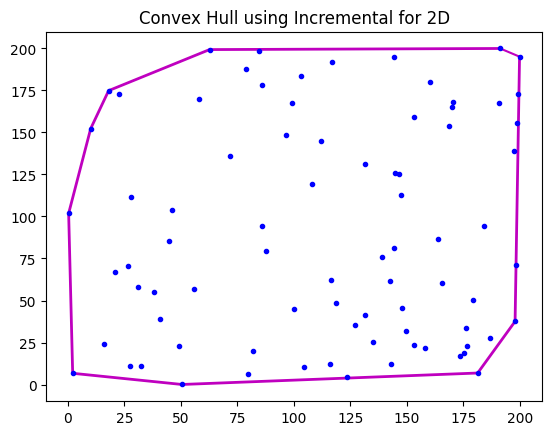

Printing CH after 1 iteration of Giftwrapping algo


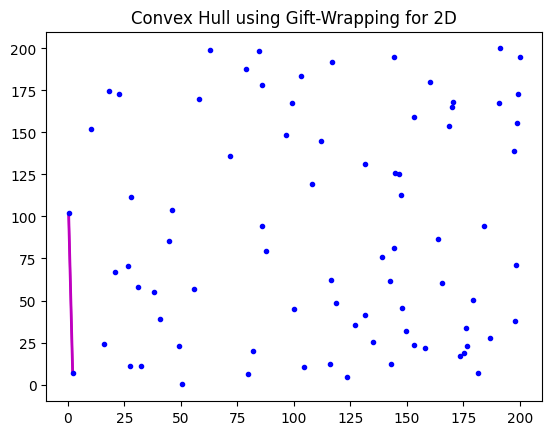

Printing CH after 2 iteration of Giftwrapping algo


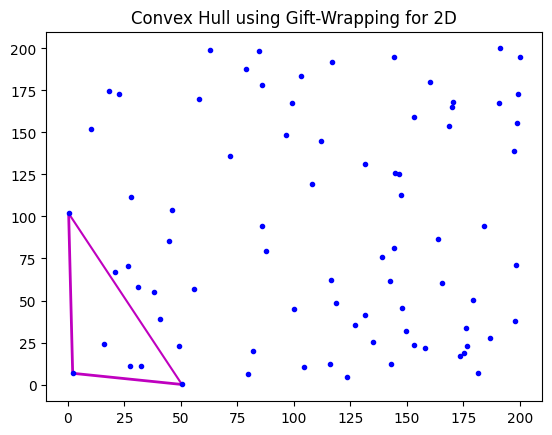

Printing CH after 3 iteration of Giftwrapping algo


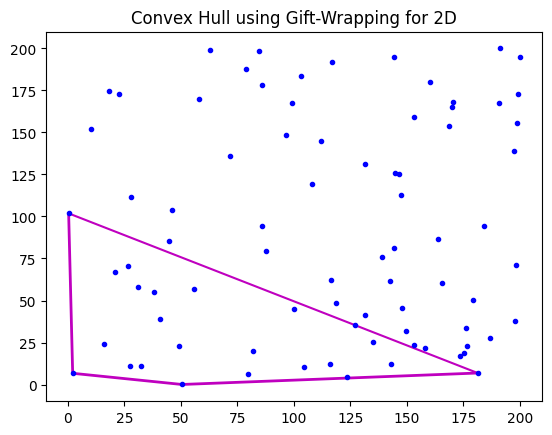

Printing CH after 4 iteration of Giftwrapping algo


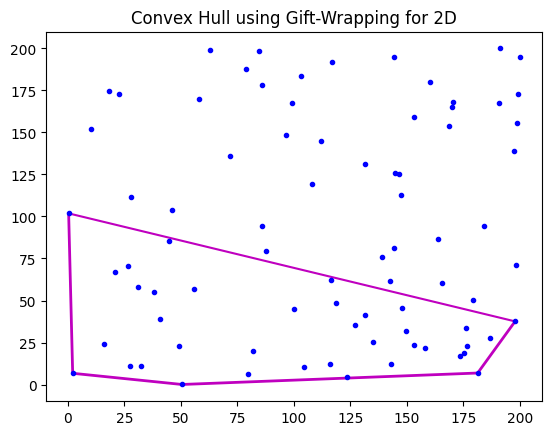

Printing CH after 5 iteration of Giftwrapping algo


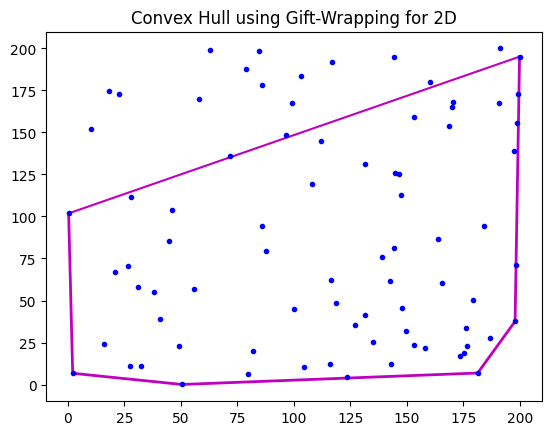

Printing CH after 6 iteration of Giftwrapping algo


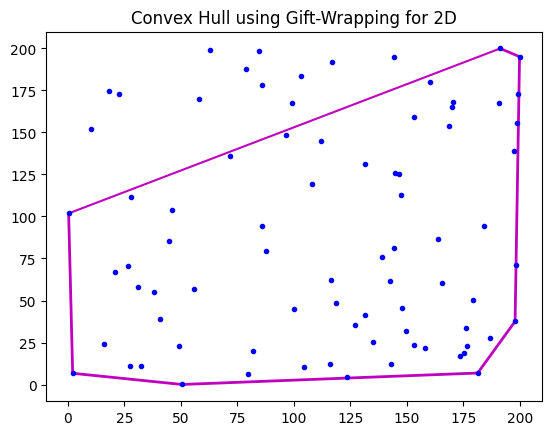

Printing CH after 7 iteration of Giftwrapping algo


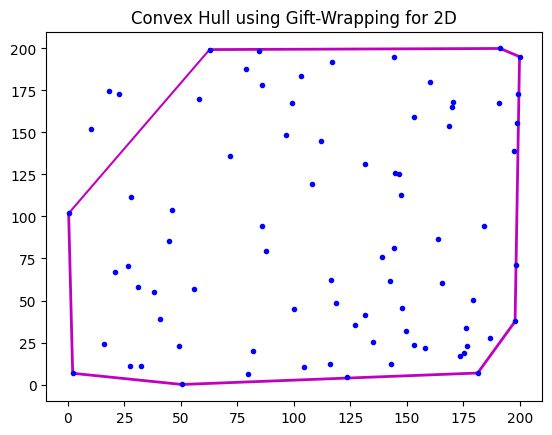

Printing CH after 8 iteration of Giftwrapping algo


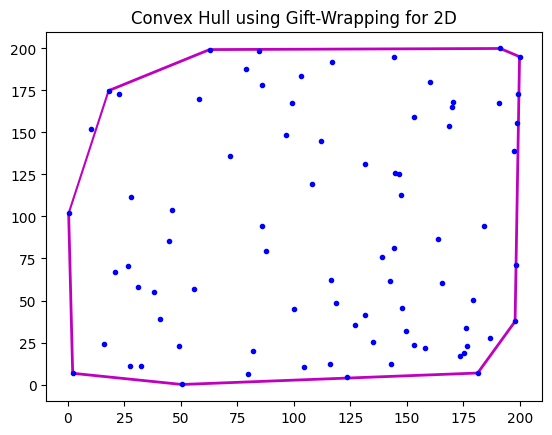

Printing CH after 9 iteration of Giftwrapping algo


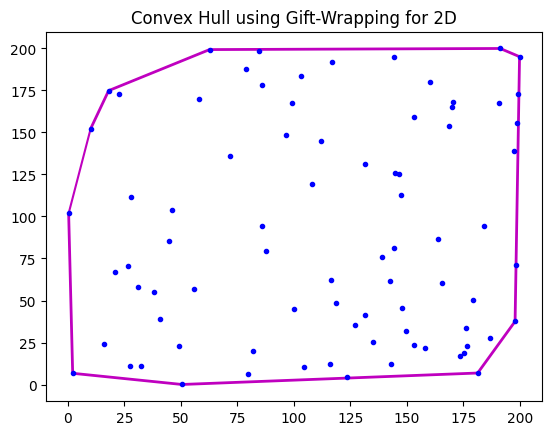

GiftWrapping did 3.1297671794891357 seconds
The points of the convex Hull generated by gift-wrapping algorithm are 
[[3.02960690e-01 1.01843828e+02]
 [2.08945507e+00 6.70346768e+00]
 [5.04536365e+01 4.68035439e-02]
 [1.81356413e+02 6.86250093e+00]
 [1.97908775e+02 3.75818664e+01]
 [1.99887209e+02 1.95080244e+02]
 [1.91319965e+02 1.99956694e+02]
 [6.26759788e+01 1.99300629e+02]
 [1.80015599e+01 1.74866356e+02]
 [1.00649059e+01 1.52294026e+02]]


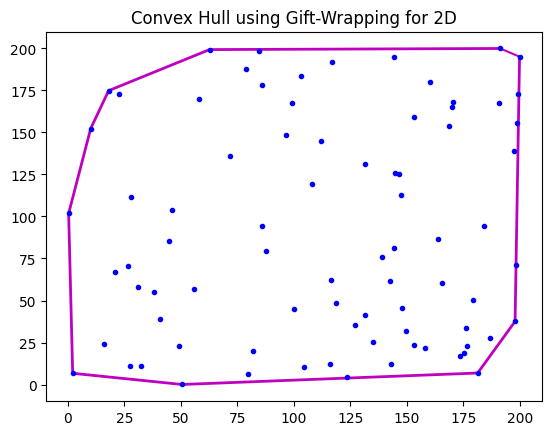

QuickHull did 0.0010280609130859375 seconds
The points of the convex Hull generated by quickhull algorithm are 
[[5.04536365e+01 4.68035439e-02]
 [1.81356413e+02 6.86250093e+00]
 [1.97908775e+02 3.75818664e+01]
 [1.99887209e+02 1.95080244e+02]
 [1.91319965e+02 1.99956694e+02]
 [6.26759788e+01 1.99300629e+02]
 [1.80015599e+01 1.74866356e+02]
 [1.00649059e+01 1.52294026e+02]
 [3.02960690e-01 1.01843828e+02]
 [2.08945507e+00 6.70346768e+00]]


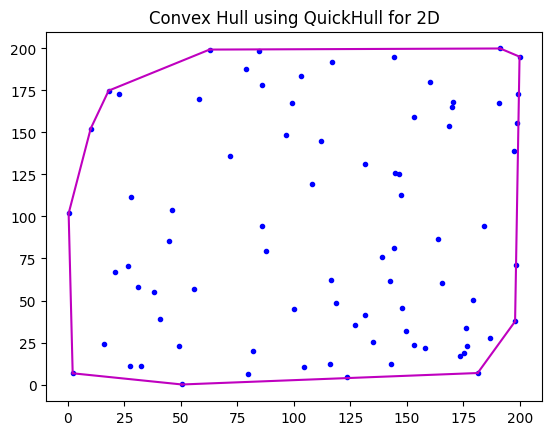

Divide and Conquer did 0.0032918453216552734 seconds
The points of the convex Hull generated by  Divide n Conquer algorithm are 
[[6.26759788e+01 1.99300629e+02]
 [1.91319965e+02 1.99956694e+02]
 [1.99887209e+02 1.95080244e+02]
 [1.97908775e+02 3.75818664e+01]
 [1.81356413e+02 6.86250093e+00]
 [5.04536365e+01 4.68035439e-02]
 [2.08945507e+00 6.70346768e+00]
 [3.02960690e-01 1.01843828e+02]
 [1.00649059e+01 1.52294026e+02]
 [1.80015599e+01 1.74866356e+02]]


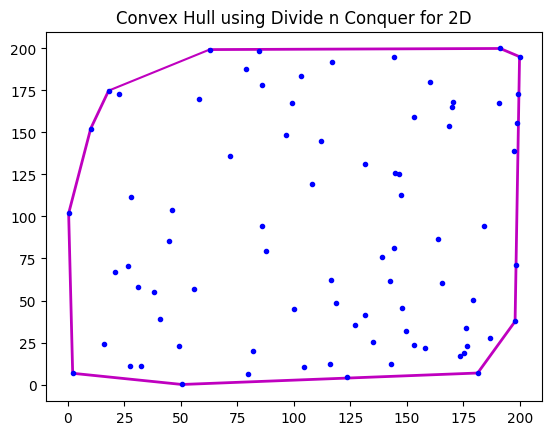

In [ ]:
def main():

  N = 80
  L = [(np.random.uniform(0,200),np.random.uniform(0,200)) for i in range(N)]
  L2 = L  

  #use incremental for 2D to construct CH
  t0 = time.time()
  CH_incr = Incremental(L)
  t1 = time.time()
  print("Incremental Graham-Scan did " + str(t1-t0) + " seconds")
  print("The points of the convex Hull generated by incremental algorithm are ")
  print(CH_incr)
  L=np.array(L)
  plotCH(CH_incr,L, 1)

  #use Gift-Wrapping for 2D to construct CH
  t0 = time.time()
  CH_gift = GiftWrapping(L)
  t1 = time.time()
  print("GiftWrapping did " + str(t1-t0) + " seconds")
  print("The points of the convex Hull generated by gift-wrapping algorithm are ")
  print(CH_gift)
  L=np.array(L)
  plotCH(CH_incr,L, 2)

  #use QuickHull for 2D to construct CH
  t0 = time.time()
  CH_quick = QuickHull(L)
  t1 = time.time()
  print("QuickHull did " + str(t1-t0) + " seconds")
  print("The points of the convex Hull generated by quickhull algorithm are ")
  print(L[CH_quick.vertices])
  L=np.array(L)
  plotCH(CH_quick,L, 3)

  #use Divide n Conquer for 2D to construct CH
  t0 = time.time()
  CH_divide = DivideNConquer(L2)
  t1 = time.time()
  print("Divide and Conquer did " + str(t1-t0) + " seconds")
  print("The points of the convex Hull generated by  Divide n Conquer algorithm are ")
  print(CH_divide)
  L2=np.array(L2)
  plotCH(CH_divide,L2, 4)

if __name__ == '__main__':
  main()


## 2.   Πώς συμπεριφέρονται οι παραπάνω αλγόριθμοι σε εκφυλισμένες περιπτώσεις; + Σύγκριση αλγορίθμων



Ο bruteHull αλγόριθμος που καλεί ο Divide n Conquer για <6 σημεία λειτουργεί σωστά στις εκφυλισμένες περιπτώσεις αφού έχει εφαρμοστεί η παρατήρηση που είχαμε αναφέρει στο μάθημα. Όσων αφορά τον αυξητικό αλγόριθμο υπάρχουν και εκφυλισμένες περιπτώσεις που οδηγούν αιτιοκρατικά σε γραμμική πολυπλοκότητα. Για παράδειγμα αν τα n-1 σημεία βρίσκονται στην ακμή την οποία ορίζουν το αριστερότερο και το δεξιότερο σημείο τότε ο αλγόριθμος έχει πολυπλοκότητα Ο(n). Σχετικά με τον αλγόριθμο περιτύλιξης, είμαστε στην χειρότερη περίπτωση όταν τα σημεία βρίσκονται πάνω σε κύκλο, ή σε παραβολή και γενικότερα όταν έχουμε σημεία τέτοια ώστε όλα να αποτελούν κορυφές του κυρτού περιβλήματος. Για μικρό πλήθος κορυφών ο αλγόριθμος γίνεται γραμμικός Ο(n). Ο αλγόριθμος Quicksort έχει πολυπλοκότητα O(nlogn) όταν τα σημεία είναι κατανεμημένα αρκετά τυχαία, αλλιώς η πολυπλοκότητα γίνεται O(n^2). <br>

 **Σύγκριση αλγορίθμων** <br>

Όλοι οι αλγόριθμοι υπολογίζουν πάντα το βέλτιστο κυρτό περίβλημα ανεξαρτήτως του πλήθος των σημείων. Για μέχρι και 10.000 σημεία δεν παρατηρούμε σημαντικές διαφορές στον χρόνο εκτέλεσης των αλγορίθμων. Αν όμως βάλουμε > 50.000 σημεία τότε είναι εμφανές ότι ο Giftwrapping αλγόριθμος είναι πιο αργός από όλους. O αυξητικός και ο QuickHull όσα σημεία και αν επιλέξουμε είναι σταθερά οι πιο γρήγοροι. Για παράδειγμα για 100.000 σημεία ο incremental και ο quickhull εμφανίζουν αποτελέσματα σε κάτω από 1 δευτερόλεπτο, ενώ ο Giftwrapping απαιτεί 10 δευτερόλεπτα και ο Divide and Conquer 2.5 δευτερόλεπτα. <br>
Τα αποτελέσματα αυτά είναι σύμφωνα και με τις πολυπλοκότητες που αναφέραμε στο μάθημα. <br>
Incremental(Graham Scan): $Ο(nlogn)$, Giftwrapping: $Ο(nh)$, QuickHull: $Ο(nlogn)$, Divide and Conquer: $Ο(nlogn)$


Ενδεικτικά κάποιοι χρόνοι: <br>
<table ><tr><th >Πλήθος σημείων <th><th> Αυξητικός <th><th> GiftWrapping <th><th> QuickHull <th><th> Divide n Conquer <tr><tr>
<tr><td> 1.000 <td><td> 0.003612518310546875 <td><td> 0.07683277130126953 <td><td> 0.0019207000732421875 <td><td> 0.03749823570251465 <td><tr> 
<tr><td> 5.000 <td><td> 0.0351109504699707 <td><td> 0.8629395961761475 <td><td> 0.010073184967041016 <td><td> 0.22504115104675293 <td><tr>
<tr><td> 10.000 <td><td> 0.03766345977783203 <td><td> 0.7860524654388428 <td><td> 0.004228353500366211 <td><td> 0.29426121711730957 <td><tr>
<tr><td> 50.000 <td><td> 0.20221829414367676 <td><td> 6.76307225227356 <td><td> 0.014299869537353516 <td><td> 1.3124377727508545 <td><tr>
<tr><td> 100.000 <td><td> 0.4412200450897217 <td><td> 12.371571063995361 <td><td> 0.024885177612304688 <td><td> 2.6053903102874756 <td><tr><table>




## 3.   Υλοποίηση κυρτού περιβήματος σε 3Δ με χρήση του QuickHull



In [ ]:
import sys
import time 
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from math import sqrt, pow, atan2, pi, degrees
import random
import plotly.graph_objects as go
import itertools, math, numpy as np
from scipy.spatial import ConvexHull

class Point:
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z
    
    def __str__(self):
        return '(' + str(self.x) + ', ' + str(self.y) + ', '+ str(self.z) +')'

def QuickHull_3D(S):
  CH = ConvexHull(S)#used ConvexHull function from SciPy library
  return CH

In [ ]:
#plot 3D convex hull, all parameters must be np.array
def plotCH3D(CH, S):
  fig = go.Figure()
  fig.update_layout(title="Convex Hull using QuickHull for 3D")
  fig.add_trace(go.Mesh3d(x=CH[:, 0], y=CH[:, 1], z=CH[:, 2], color="cyan", opacity=.5,alphahull=0))
  #fig.add_trace(go.Scatter3d(x=CH[:, 0],y=CH[:, 1],z=CH[:, 2], mode='markers', marker=dict(color='blue')))
  fig.add_trace(go.Scatter3d(x=S[:, 0],y=S[:, 1],z=S[:, 2], mode='markers', marker=dict(color='magenta')))
  fig.show()

def main():

  N = 50
  #generate N random points in 3D space 
  L = [(np.random.uniform(0,200),np.random.uniform(0,200), np.random.uniform(0,200)) for i in range(N)]
  L = np.array(L)

  #use incremental for 3D to construct CH
  t0 = time.time()
  CH_3D = QuickHull_3D(np.asarray(L))
  t1 = time.time()
  print("QuickHull for 3D did " + str(t1-t0) + " seconds")
  print("The points of the convex Hull generated by QuickHull are ")
  print(L[CH_3D.vertices])
  plotCH3D(L[CH_3D.vertices],L)

if __name__ == '__main__':
  main()


QuickHull for 3D did 0.0015454292297363281 seconds
The points of the convex Hull generated by QuickHull are 
[[ 22.22350487  35.88585198 174.29241359]
 [187.11090008  47.37370391 163.96902565]
 [ 41.07956689 158.97234867 193.62667125]
 [  6.3786999   41.5532277   91.3658082 ]
 [ 94.50627938  39.63119167 190.01574004]
 [ 56.44846402 181.27108484  63.20372061]
 [198.4478911    0.20367669  21.14793222]
 [189.18508015  50.57326351   7.42507682]
 [  5.82935094 133.74028643  94.16818796]
 [145.50603129 134.70320042  20.66513259]
 [ 71.37790608 144.17549064   5.68074809]
 [ 31.1398192   12.72923708 103.37822032]
 [ 40.20831436 187.38667099 191.8462826 ]
 [105.13553553 141.94565216 193.22748526]
 [ 76.8260793  168.10640917   4.91039942]
 [164.85283548  94.00126887 174.71089341]
 [106.00220782   5.30872171  80.97268549]
 [103.27695252  36.92467935   6.43133312]
 [  7.21364999 137.26790792 176.62048171]
 [133.84748551 184.97211006 152.89955355]
 [ 27.30056853  50.12878651  18.9855941 ]
 [155.275

#Υλοποίηση 2: Γεωμετρική αναζήτηση

##Εφαρμογή 2: Γεωμετρική Αναζήτηση

Query Range:
 [[ 9 25]
 [38 95]]


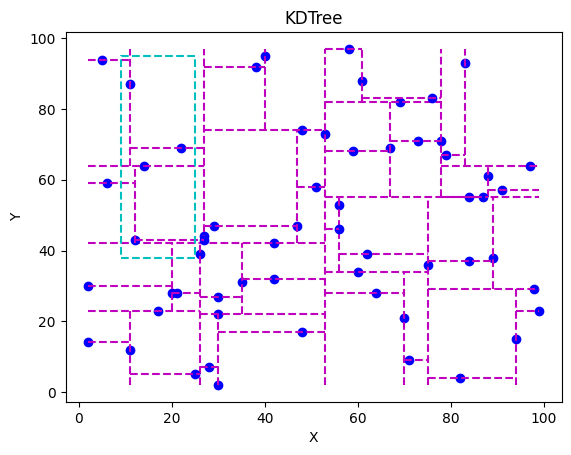

Points within Query Range:
[14 64]
[12 43]
[11 87]
[22 69]
The creation of the kdTree took  0.00029778480529785156 seconds for 60 points
The range search took  0.0005028247833251953 seconds for 60 points


In [157]:
import math
import sys
import matplotlib.pyplot as plt
import numpy as np

class Node:
  def __init__(self, point, depth, left=None, right=None):
      self.point = point
      self.left = left
      self.right = right
      self.depth = depth

  def is_leaf(self):
        return self.left is None and self.right is None
  def print_tree(self):
        if self is None:
            return

        print(self)
        if self.left is not None:
            self.left.print_tree()
        if self.right is not None:
            self.right.print_tree()

  def __str__(self):
        return f"Node(point={self.point}, depth={self.depth})"
#construct range of node in kd-tree
def construct_range(node):
    if node is None:
        return None
    
    # Initialize the range with the coordinates of the node
    range_x = [node.point[0], node.point[0]]
    range_y = [node.point[1], node.point[1]]
    
    # Recursively update the range based on the left and right subtrees
    if node.left is not None:
        left_range = construct_range(node.left)
        range_x[0] = min(range_x[0], left_range[0])
        range_x[1] = max(range_x[1], left_range[1])
        range_y[0] = min(range_y[0], left_range[2])
        range_y[1] = max(range_y[1], left_range[3])
    
    if node.right is not None:
        right_range = construct_range(node.right)
        range_x[0] = min(range_x[0], right_range[0])
        range_x[1] = max(range_x[1], right_range[1])
        range_y[0] = min(range_y[0], right_range[2])
        range_y[1] = max(range_y[1], right_range[3])
    
    return [range_x[0], range_x[1], range_y[0], range_y[1]]

#comstruct kd-tree for set of points P
def create_kd_Tree(P, depth=0):
  n = len(P)
  if(n<=0):
    return None
  if n == 1:
    return Node(point=P[0], left=None, right=None, depth=depth)
  elif n>1:
    P = sorted(P, key=lambda x: x[depth % 2])
    median = math.floor(n/2)
    return Node(point=P[median], left=create_kd_Tree(P[:median], depth+1), right=create_kd_Tree(P[median+1:], depth+1), depth=depth)

#check whether a point is inside the query range
def point_in_range(point, query_range):
    for i in range(2):
        if point[i] < query_range[i][0] or point[i] > query_range[i][1]:
            return False
    return True

def range_intersects(node_range, query_range):
    node_minx = node_range[0]
    node_maxx = node_range[1]
    node_miny = node_range[2]
    node_maxy = node_range[3]
    query_minx = query_range[0][0]
    query_maxx = query_range[0][1]
    query_miny = query_range[1][0]
    query_maxy = query_range[1][1]

    if node_maxx < query_minx or node_minx > query_maxx:
      return False
    if node_maxy < query_miny or node_miny > query_maxy:
      return False

    return True

def is_range_inside_query(node_range, query_range):
    node_minx = node_range[0]
    node_maxx = node_range[1]
    node_miny = node_range[2]
    node_maxy = node_range[3]
    query_minx = query_range[0][0]
    query_maxx = query_range[0][1]
    query_miny = query_range[1][0]
    query_maxy = query_range[1][1]

    if node_minx < query_minx or node_maxx > query_maxx:
      return False
    if node_miny < query_miny or node_maxy > query_maxy:
      return False

    return True


def report_subtree(node):
    if node is None:
        return []

    result = []
    result.append(node.point)
    result.extend(report_subtree(node.left))
    result.extend(report_subtree(node.right))

    return result


def search_kd_tree(node, R):
    result = []
    if node is None:
        return result

    axis = node.depth % 2
    if node.left is None and node.right is None:
      if point_in_range(node.point, R):
          result.append(node.point)
      return result

    if point_in_range(node.point, R):
        result.append(node.point)

    if node.left is not None:
      left_range = construct_range(node.left)
      if is_range_inside_query(left_range, R):
          result.extend(report_subtree(node.left))
      elif range_intersects(left_range, R):
          result.extend(search_kd_tree(node.left, R))

    if node.right is not None:
      right_range = construct_range(node.right)
      if is_range_inside_query(right_range, R):
          result.extend(report_subtree(node.right))
      elif range_intersects(right_range, R):
          result.extend(search_kd_tree(node.right, R))

    return result

#plots kd tree and the box for the query range
def plot_kd_tree(node, xmin, xmax, ymin, ymax, R, depth=0):  
    if node is None:
        return

    point = node.point
    left = node.left
    right = node.right

    axis = depth % len(point)

    if axis == 0:
        plt.plot([point[0]], [point[1]], 'bo')
        plt.plot([point[0], point[0]], [ymin, ymax], 'm--')
        plot_kd_tree(left, xmin, point[0], ymin, ymax, R, depth + 1)
        plot_kd_tree(right, point[0], xmax, ymin, ymax, R, depth + 1)
    else:
        plt.plot([point[0]], [point[1]], 'bo')
        plt.plot([xmin, xmax], [point[1], point[1]], 'm--')
        plot_kd_tree(left, xmin, xmax, ymin, point[1], R, depth + 1)
        plot_kd_tree(right, xmin, xmax, point[1], ymax, R, depth + 1)

    if depth == 0:
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('KDTree')
        x_min, x_max = R[0, :]
        y_min, y_max = R[1, :]
        plt.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], 'c--')
        plt.show()
        
    

def plot_points(P):
    plt.scatter(P[:, 0], P[:, 1], color='cyan', marker='o')

def generate_random_query_range():
    query_range = []
    for _ in range(2):
        min_val = random.randint(0, 100)
        max_val = random.randint(0, 100)
        if(max_val < min_val):
          temp = max_val 
          max_val = min_val
          min_val = temp
        query_range.append((min_val, max_val))
    return query_range

def main():
  N = 60

  P = np.array([(np.random.randint(0,100),np.random.randint(0,100)) for i in range(N)])
  t0 = time.time()
  kd = create_kd_Tree(P)
  t1 = time.time()
  R = np.array(generate_random_query_range())
  print("Query Range:\n", R)

  plot_kd_tree(kd, np.min(P[:, 0]), np.max(P[:, 0]), np.min(P[:, 1]), np.max(P[:, 1]), R)
  t2 = time.time()
  result = search_kd_tree(kd, R)
  t3 = time.time()
  print("Points within Query Range:")
  for point in result:
      print(point)

  print("The creation of the kdTree took  " + str(t1-t0) + " seconds for " + str(N) + " points")
  print("The range search took  " + str(t3-t2) + " seconds for " + str(N) + " points")

if __name__ == '__main__':
	main()

**Ανάλυση πολυπλοκότητας του αλγορίθμου:**
<br>
Από την θεωρία γνωρίζουμε ότι ένα kd δέντρο n σημείων για την κατασκευή του απαιτεί χρόνο Ο(nlogn) και χώρο Ο(n). Σε κάθε φύλλο του του kd δέντρου αποθηκεύεται ένα διαφορετικό σημείο του P, άρα έχουμε n φύλλα. Ο χρόνος κατασκευής Τ(n) ικανοποιέι την αναδρομική σχέση: $ T(n)=O(n)+2T(\lceil{\frac{n}{2}}\rceil)$, που ισουναμεί με Ο(nlogn). Επίσης ένα ορθογωνιακό εκτασιακό ερώτημα προς το kd δέντρο μπορεί να απαντηθεί σε χρόνο $Ο(\sqrt{n} + k)$, όπου κ είναι το πλήθος των αναφερόμενων σημείων. Το πλήθος Q(n) των τεμνόμενων περιοχών σε ένα kd δέντρο που έχει αποθηκευμένα n σημεία ικανοποιεί την αναδρομική σχέση $Q(n)= 2 + 2Q(\frac{n}{4})$, που ισοδυναμεί με $Ο(\sqrt{n})$. Δηλαδή κάθε οριζόντια ή κάθετη γραμμή στο kd δέντρο τέμνει $Ο(\sqrt{n})$ περιοχές. 
<br>
<br>
Ενδεικτικά κάποιοι χρόνοι: <br>
<table ><tr><th >Πλήθος σημείων <th><th> kdTree <th><th> Search <tr><tr>
<tr><td> 1000 <td><td>  0.004755735397338867<td><td>  0.005057096481323242 <td><tr> 
<tr><td> 5000 <td><td>  0.06017422676086426<td><td>  0.05999040603637695<td><tr>
<tr><td> 10.000 <td><td>  0.06092238426208496<td><td>  0.052483558654785156 <td><tr>
<tr><td> 50.000 <td><td> 0.7277195453643799 <td><td>  0.545076847076416 <td><tr>
<tr><td> 100.000 <td><td> 1.331453561782837 <td><td>  0.4708845615386963 <td><tr><table>

##Εφαρμογή 3: Διάγραμα Voronoi και Τριγωνοποίηση Dealunay

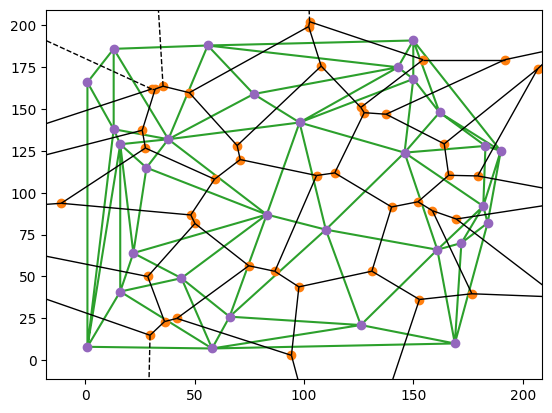

The Voronoi diagram took  0.0010447502136230469 seconds to be created for 30 points
The Delaunay triangulation took  0.0008397102355957031 seconds to be created for 30 points


In [39]:
import sys
import time 
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d
from scipy.spatial import Delaunay
import random

def main():

  N = 30
  P = np.array([(np.random.randint(0,200),np.random.randint(0,200)) for i in range(N)])

  #create Voronoi diagram
  t0 = time.time()
  vor = Voronoi(P)
  t1 = time.time()
  fig = voronoi_plot_2d(vor)

  #creata Delaunay triangulation
  t2 = time.time()
  tri = Delaunay(P)
  t3 = time.time()
  plt.triplot(P[:, 0], P[:, 1], tri.simplices)
  plt.plot(P[:,0], P[:,1], 'o')
  plt.show()

  print("The Voronoi diagram took  " + str(t1-t0) + " seconds to be created for " + str(N) + " points")
  print("The Delaunay triangulation took  " + str(t3-t2) + " seconds to be created for " + str(N) + " points")

if __name__ == '__main__':
  main()

Για την υλοποίηση του ζητουμένου χρησιμοποιήθηκε η βιβλιοθηκή sciPy που περιέχει συναρτήσεις για την δημιουργία του διαγράμματος Voronoi και της τριγωνοποίησης Delaunay. Από την γραφική παράσταση βλέπουμε ότι η τριγωνοποίηση Delaunay είναι o δυικός γράφος του διαγράμματος Voronoi. 
<br>
<br>
**Σχολιασμός πολυπλοκότητας:**
Η πολυπλοκότητα και των 2 διαδικασιών είναι πολυωνυμική, πιο συγκεκριμένα και οι 2 έχουν πολυπλοκότητα Ο(nlogn). Ο χρόνος εκτέλεσης αυξάνεται αναλογικά με το πλήθος των σημείων. Το γεγονός ότι οι χρόνοι εκτέλεσης και οι πολυπλοκότητες των 2 διαδικασιών είναι σχεδόν ίδιες οφείλεται στο σχέση δυισμού που τις συνδέει. 
<br>
<br>
Ενδεικτικά κάποιοι χρόνοι: <br>
<table ><tr><th >Πλήθος σημείων <th><th> Voronoi <th><th> Delaunay <tr><tr>
<tr><td> 1.000 <td><td> 0.018650293350219727 <td><td> 0.03326416015625 <td><tr> 
<tr><td> 5.000 <td><td> 0.050739288330078125 <td><td> 0.035407304763793945 <td><tr>
<tr><td> 10.000 <td><td> 0.1267108917236328 <td><td> 0.1040639877319336 <td><tr>
<tr><td> 50.000 <td><td> 0.7128596305847168 <td><td> 0.5744791030883789 <td><tr>
<tr><td> 1.000.000 <td><td> 5.885384559631348 <td><td> 5.8839311599731445 <td><tr><table>